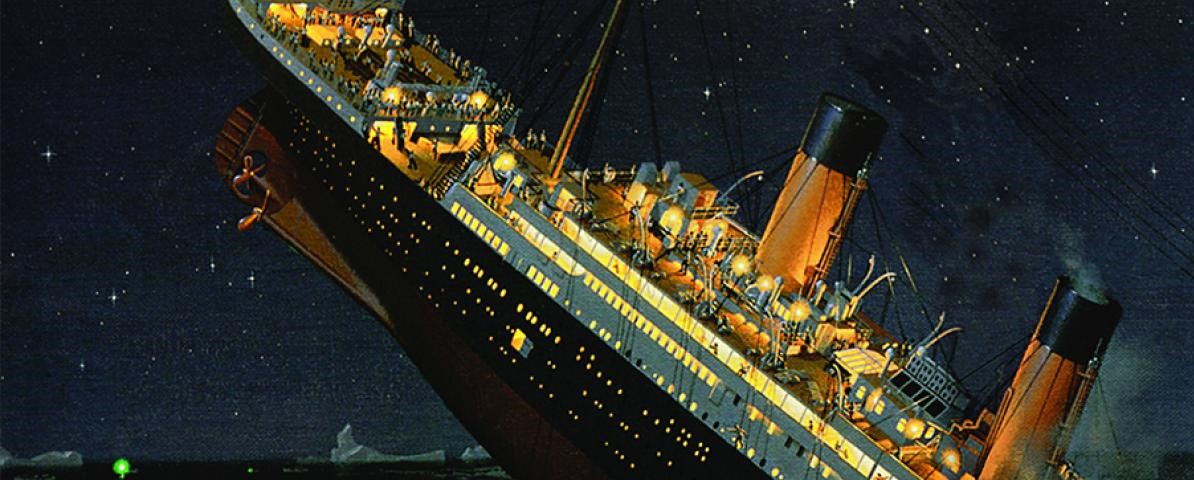

**We are using the Titanic Dataset here. It contains both numerical and string values.**

# **The predefined columns are:**
*   Passenger ID - To identify unique passengers
*   Survived - If they survived or not
*   P Class - The class passengers travelled in
*   Name - Passenger Name
*   Sex - Gender of Passenger
*   Age - Age of passenger  
*   Fare - Amount paid for the ticket

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Wrangling Function**

**The wrangle function processes the Titanic dataset by performing several steps including displaying initial observations, examining data types and missing values, checking for duplicates, and replacing certain values in specific columns. Below is the detailed implementation of the function.**

In [140]:
def wrangle(data_path):
    titanic_data = pd.read_csv(data_path)

    # Displaying the initial observations
    print("Initial Observations:")
    print(titanic_data.head(10))
    print()

    # Conducting an examination of data types and missing values
    print("Info about data:")
    print(titanic_data.info(show_counts=True))
    print()

    # Check for duplicated rows
    print("Number of duplicated rows:", titanic_data.duplicated().sum())
    print()

    # Descriptive statistics
    print("Descriptive Statistics:")
    print(titanic_data.describe().transpose())
    print()

    # Columns with null values
    print("Columns with null values:")
    columns_with_null = titanic_data.columns[titanic_data.isnull().any()].tolist()
    print(columns_with_null)
    print()

    # Dropping specified columns
    columns_to_drop = ["Name", "SibSp", "Parch","Ticket", "Cabin", "Embarked"]
    titanic_data.drop(columns_to_drop, axis=1, inplace=True)

    # Replacing 0 with 'Non Survived' and 1 with 'Survived' in 'SurviveVid'
    titanic_data['Survived'].replace({0: 'Non Survived', 1: 'Survived'}, inplace=True)
    titanic_data['Pclass'].replace({1: '1st', 2: '2nd', 3:"3rd"}, inplace=True)

    return titanic_data

# Example usage
data_path = "titanic.csv"
data = wrangle(data_path)

Initial Observations:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr.

In [141]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,Non Survived,3rd,male,22.0,7.2500
1,2,Survived,1st,female,38.0,71.2833
2,3,Survived,3rd,female,26.0,7.9250
3,4,Survived,1st,female,35.0,53.1000
4,5,Non Survived,3rd,male,35.0,8.0500


In [142]:
data['Age'].fillna(data.Age.mean(), inplace=True)
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

# **pie chart presenting the male/female proportion**

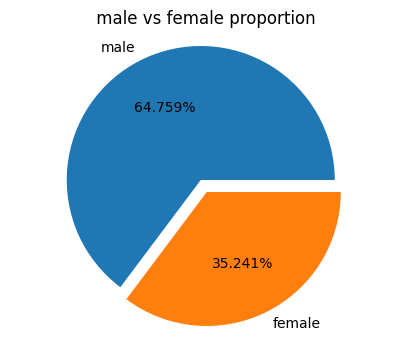

In [143]:
totalSex = data.Sex.value_counts().reset_index()
plt.figure(figsize=(5,4))
plt.pie(totalSex['count'],labels=totalSex['Sex'], autopct="%1.3F%%" , explode=[0.1,0])
plt.title(" male vs female proportion")
plt.axis('equal')
plt.show()

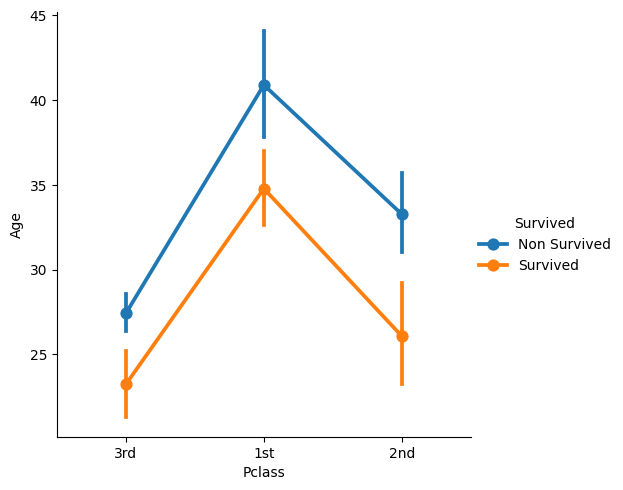

In [144]:
sns.catplot(y = 'Age', x='Pclass', hue='Survived',kind='point', data=data)
##Passengers who did not survive (Survived = 0) were generally older than those who did survive (Survived = 1) across all classes.
##This suggests that younger passengers had a higher survival rate.

**Plot the distribution of each numerical feature**

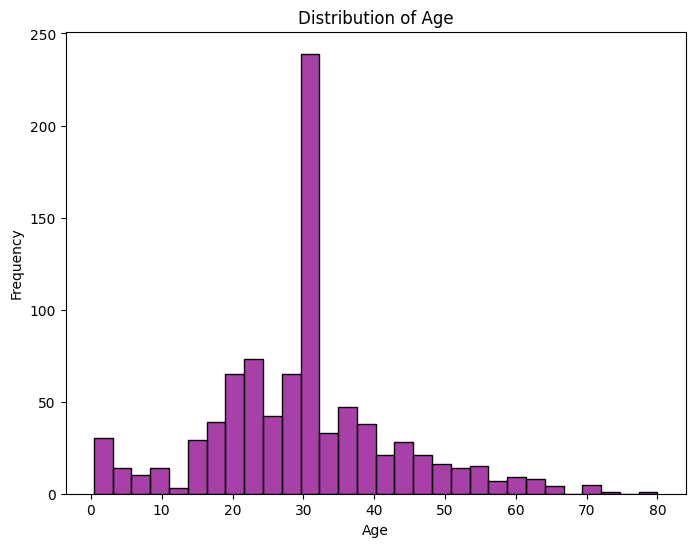

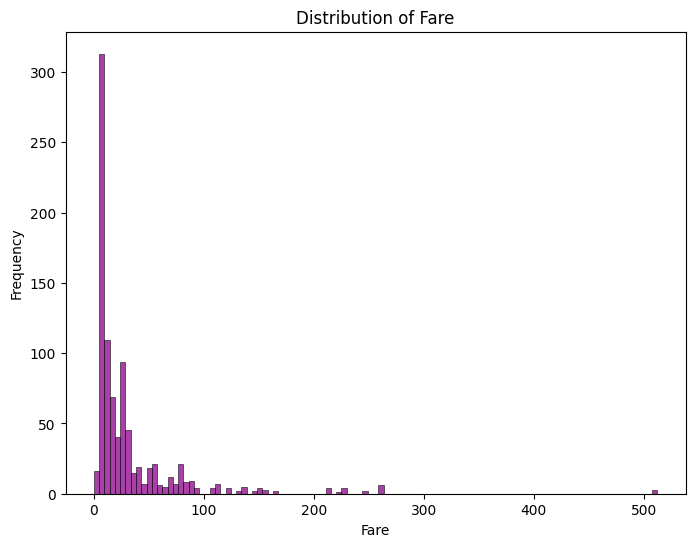

In [145]:
# Plot the distribution of each numerical feature
numerical_features = ['Age', 'Fare']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, color = "darkmagenta")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# **Plot the distribution of Age (male vs female)**
# **This allows us to see if there are differences in the age distribution between males and females.**




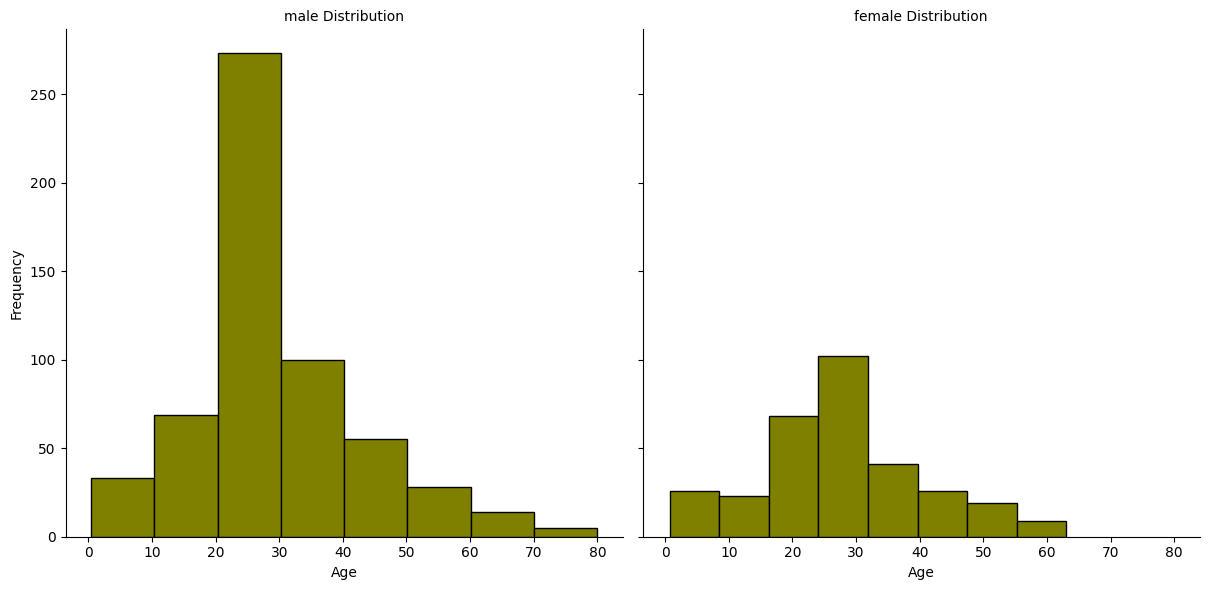

In [146]:
g = sns.FacetGrid(data, col='Sex', height=6, aspect=1)
g.map(plt.hist, 'Age', bins=8, color='olive', edgecolor='black')

g.set_axis_labels('Age', 'Frequency')
g.set_titles(col_template='{col_name} Distribution')
plt.show()

# **show the number of males and females**
**numbers of males more than numbers of females**

<ipython-input-147-5c217e923783>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Sex", palette=['blue', 'orange'])


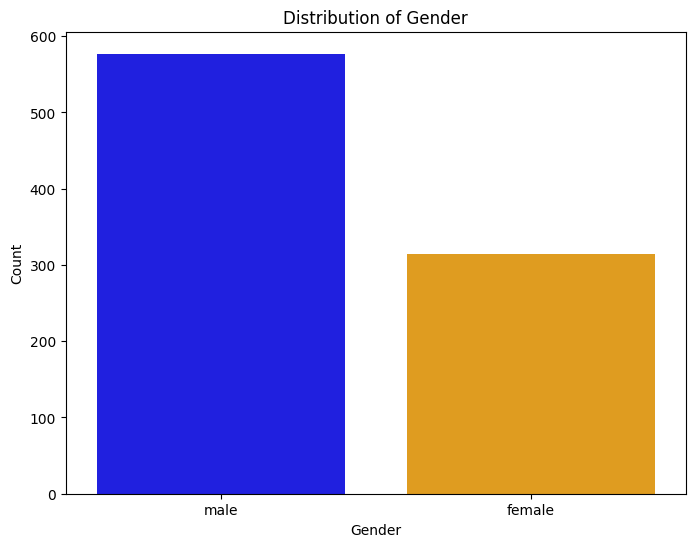

In [147]:
# Plot the distribution of Sex where male is blue and female is orange
categorical_features = 'Sex'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Sex", palette=['blue', 'orange'])
plt.title(f'Distribution of {"Gender"}')
plt.xlabel("Gender")
plt.ylabel('Count')
plt.show()

# **show the survival distribution within each gender**

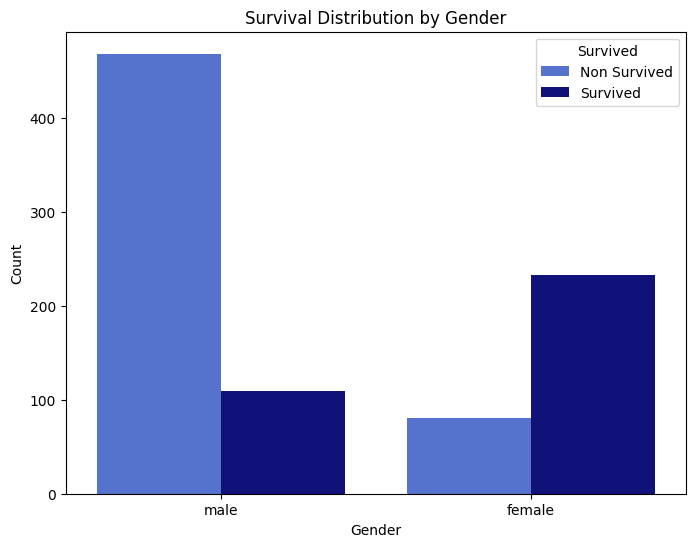

In [148]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='Survived', palette=['royalblue', 'darkblue'])
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()